In [22]:
# upload your file
from google.colab import files
uploaded = files.upload()

Saving example.csv to example.csv


In [73]:
# upload a file
df = pd.read_csv("example.csv")
# check out your data
df.head(3)

,col1,col2,col3,col4,Target
0,1,0,7,13,1
1,1,0,8,14,2
2,1,0,9,15,3


In [102]:
# change the 'target' label to the name of the column you're predicting
X = df.drop(columns=['Target'])
y = df['Target']

In [103]:
# split test and train data
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

stnd_scaler = StandardScaler()
X_scaled = stnd_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,
                                                    random_state=42)

In [91]:
# run grid search to make the mode
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

clf = BayesianRidge(fit_intercept=True)

pipe = Pipeline([('clf', clf)])
param_grid = {'clf__alpha_1': (1e-6,1e-5),
              'clf__alpha_2': (1e-6,1e-5),
              'clf__n_iter': (300,350)
              }
model = GridSearchCV(pipe,param_grid,cv=10,
                     scoring='neg_root_mean_squared_error')
model.fit(X_train,y_train)
print('Best parameters:', model.best_params_)

y_test_pred = model.predict(X_test)
y_test_pred_rmse = mean_squared_error(y_test,y_test_pred,squared=False)
print(f'RMSE of test data: {y_test_pred_rmse}')

Best parameters: {'clf__alpha_1': 1e-05, 'clf__alpha_2': 1e-05, 'clf__n_iter': 300}
RMSE of test data: 3.4169190369165577e-07


In [106]:
# run after grid, change this to have the information printed above
finalmodel = BayesianRidge(fit_intercept=True, alpha_1=1e-05,alpha_2=1e-05,n_iter=300)

# get stats
finalmodel.fit(X_train,y_train)
print('Intercept:',finalmodel.intercept_)
print('Coefficients:', X.columns, finalmodel.coef_)

Intercept: 25.500000032959953
Coefficients: Index(['col1', 'col2', 'col3', 'col4'], dtype='object') [-1.45315227e-08  1.22269732e-08  7.21543503e+00  7.21543503e+00]


In [83]:
# predict on 20% hold out
visualize = pd.DataFrame(X_test)
visualize['predictions'] = model.predict(visualize)
visualize['actual'] = list(y_test)
visualize.head()

,0,1,2,3,predictions,actual
0,1.457738,-0.623610,-0.796903,-0.796903,14.000000,14
1,-0.685994,1.603567,1.004790,1.004790,40.000000,40
2,-0.685994,-0.623610,0.381127,0.381127,31.000000,31
3,-0.685994,1.603567,1.420566,1.420566,46.000001,46
4,-0.685994,-0.623610,-0.519719,-0.519719,18.000000,18


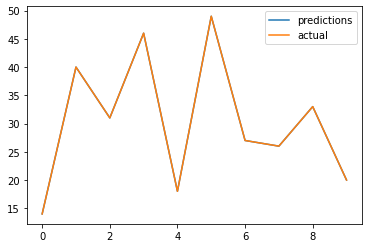

In [85]:
# see the output with your own eyes
visualize['predictions'].round().astype(int)
visualize[['predictions','actual']].plot()